In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car_price_prediction_dataset.csv")
df

car name                variant  \
0              2015Hyundai Grand i10 Sportz                      -   
1                  2018Mahindra TUV 300 T10                      -   
2                  2016Honda City i DTEC SV                      -   
3             2016Hyundai Creta 1.6 CRDi SX                      -   
4     2014Ford EcoSport 1.5 DV5 MT Titanium                      -   
...                                     ...                    ...   
5281                      2011 Maruti Swift                    VXI   
5282                         2019 Ford Figo  1.2P Titanium Plus MT   
5283                    2016 Maruti Wagon R                    VXI   
5284                        2013 Honda Brio                   E MT   
5285                     2020 Ford Ecosport       1.5 Petrol Trend   

      manufacturing year driven kilometers    fuel no.of.owners        price  \
0                   2015      1,00,035 kms  Petrol  First Owner    4.1 Lakh*   
1                   2018        50,000 kms  Diesel  First Owner   8.75 Lakh*   
2                   2016        68,000 kms  Diesel  First Owner    8.1 Lakh*   
3                   2016        69,000 kms  Diesel  First Owner  10.25 Lakh*   
4                   2014        45,000 kms  Diesel  First Owner   6.25 Lakh*   
...                  ...               ...     ...          ...          ...   
5281                2011       105,621 Kms  Petrol    1st Owner     2,65,000   
5282                2019        28,638 Kms  Petrol    1st Owner     5,55,000   
5283                2016       115,748 Kms  Petrol    1st Owner     3,15,000   
5284                2013        67,159 Kms  Petrol    1st Owner     2,58,000   
5285                2020        10,296 Kms  Petrol    1st Owner     8,41,000   

                  location  
0     used cars in chennai  
1     used cars in chennai  
2     used cars in chennai  
3     used cars in chennai  
4     used cars in chennai  
...                    ...  
5281    used cars in noida  
5282    used cars in noida  
5283    used cars in noida  
5284    used cars in noida  
5285    used cars in noida  

[5286 rows x 8 columns]

EDA PROCESS

In [3]:
d_kilo1=[]
for i in df["driven kilometers"]:
    d_kilo1.append(i.replace("kms",""))
d_kilo1

['1,00,035 ',
 '50,000 ',
 '68,000 ',
 '69,000 ',
 '45,000 ',
 '66,000 ',
 '72,000 ',
 '55,000 ',
 '77,400 ',
 '65,306 ',
 '1,20,000 ',
 '47,000 ',
 '35,000 ',
 '37,000 ',
 '88,123 ',
 '30,000 ',
 '42,000 ',
 '64,523 ',
 '55,001 ',
 '65,280 ',
 '19,000 ',
 '63,000 ',
 '42,000 ',
 '49,000 ',
 '90,000 ',
 '60,000 ',
 '62,003 ',
 '80,364 ',
 '2,02,066 ',
 '1,00,000 ',
 '45,000 ',
 '42,000 ',
 '52,000 ',
 '52,001 ',
 '1,30,000 ',
 '45,000 ',
 '4,20,000 ',
 '18,000 ',
 '19,000 ',
 '8,515 ',
 '64,950 ',
 '37,737 ',
 '20,703 ',
 '1,74,815 ',
 '86,839 ',
 '98,000 ',
 '63,000 ',
 '91,500 ',
 '46,001 ',
 '64,000 ',
 '78,000 ',
 '48,000 ',
 '40,001 ',
 '42,306 ',
 '76,000 ',
 '27,000 ',
 '36,000 ',
 '34,010 ',
 '71,000 ',
 '42,000 ',
 '2,000 ',
 '20,001 ',
 '30,000 ',
 '29,000 ',
 '69,000 ',
 '12,000 ',
 '76,000 ',
 '82,000 ',
 '52,000 ',
 '1,14,937 ',
 '44,000 ',
 '38,000 ',
 '22,001 ',
 '41,000 ',
 '27,001 ',
 '65,000 ',
 '43,000 ',
 '34,924 ',
 '97,337 ',
 '21,050 ',
 '77,000 ',
 '89,558 ',
 '

In [4]:
d_kilo=[]
for i in d_kilo1:
    d_kilo.append(i.replace("Kms",""))
d_kilo

['1,00,035 ',
 '50,000 ',
 '68,000 ',
 '69,000 ',
 '45,000 ',
 '66,000 ',
 '72,000 ',
 '55,000 ',
 '77,400 ',
 '65,306 ',
 '1,20,000 ',
 '47,000 ',
 '35,000 ',
 '37,000 ',
 '88,123 ',
 '30,000 ',
 '42,000 ',
 '64,523 ',
 '55,001 ',
 '65,280 ',
 '19,000 ',
 '63,000 ',
 '42,000 ',
 '49,000 ',
 '90,000 ',
 '60,000 ',
 '62,003 ',
 '80,364 ',
 '2,02,066 ',
 '1,00,000 ',
 '45,000 ',
 '42,000 ',
 '52,000 ',
 '52,001 ',
 '1,30,000 ',
 '45,000 ',
 '4,20,000 ',
 '18,000 ',
 '19,000 ',
 '8,515 ',
 '64,950 ',
 '37,737 ',
 '20,703 ',
 '1,74,815 ',
 '86,839 ',
 '98,000 ',
 '63,000 ',
 '91,500 ',
 '46,001 ',
 '64,000 ',
 '78,000 ',
 '48,000 ',
 '40,001 ',
 '42,306 ',
 '76,000 ',
 '27,000 ',
 '36,000 ',
 '34,010 ',
 '71,000 ',
 '42,000 ',
 '2,000 ',
 '20,001 ',
 '30,000 ',
 '29,000 ',
 '69,000 ',
 '12,000 ',
 '76,000 ',
 '82,000 ',
 '52,000 ',
 '1,14,937 ',
 '44,000 ',
 '38,000 ',
 '22,001 ',
 '41,000 ',
 '27,001 ',
 '65,000 ',
 '43,000 ',
 '34,924 ',
 '97,337 ',
 '21,050 ',
 '77,000 ',
 '89,558 ',
 '

In [5]:
d_kilo2=[]
for i in d_kilo:
    d_kilo2.append(i.replace(",",""))
d_kilo2

['100035 ',
 '50000 ',
 '68000 ',
 '69000 ',
 '45000 ',
 '66000 ',
 '72000 ',
 '55000 ',
 '77400 ',
 '65306 ',
 '120000 ',
 '47000 ',
 '35000 ',
 '37000 ',
 '88123 ',
 '30000 ',
 '42000 ',
 '64523 ',
 '55001 ',
 '65280 ',
 '19000 ',
 '63000 ',
 '42000 ',
 '49000 ',
 '90000 ',
 '60000 ',
 '62003 ',
 '80364 ',
 '202066 ',
 '100000 ',
 '45000 ',
 '42000 ',
 '52000 ',
 '52001 ',
 '130000 ',
 '45000 ',
 '420000 ',
 '18000 ',
 '19000 ',
 '8515 ',
 '64950 ',
 '37737 ',
 '20703 ',
 '174815 ',
 '86839 ',
 '98000 ',
 '63000 ',
 '91500 ',
 '46001 ',
 '64000 ',
 '78000 ',
 '48000 ',
 '40001 ',
 '42306 ',
 '76000 ',
 '27000 ',
 '36000 ',
 '34010 ',
 '71000 ',
 '42000 ',
 '2000 ',
 '20001 ',
 '30000 ',
 '29000 ',
 '69000 ',
 '12000 ',
 '76000 ',
 '82000 ',
 '52000 ',
 '114937 ',
 '44000 ',
 '38000 ',
 '22001 ',
 '41000 ',
 '27001 ',
 '65000 ',
 '43000 ',
 '34924 ',
 '97337 ',
 '21050 ',
 '77000 ',
 '89558 ',
 '113059 ',
 '53000 ',
 '370000 ',
 '23850 ',
 '122531 ',
 '88000 ',
 '45000 ',
 '61000 ',
 

In [6]:
df.drop("driven kilometers",axis=1,inplace=True)

In [7]:
df["driven kilometers"]=d_kilo2

In [8]:
df["driven kilometers"]=df["driven kilometers"].astype(float)

In [9]:
prices1=[]
for i in df["price"]:
    prices1.append(i.replace("Lakh*",""))
prices1

['4.1 ',
 '8.75 ',
 '8.1 ',
 '10.25 ',
 '6.25 ',
 '5.25 ',
 '2.8 ',
 '4.5 ',
 '2.95 ',
 '3.9 ',
 '23.5 ',
 '3.75 ',
 '6.75 ',
 '26 ',
 '3.25 ',
 '15 ',
 '21.75 ',
 '6.1 ',
 '3.95 ',
 '5.2 ',
 '4.3 ',
 '23.5 ',
 '4.5 ',
 '6.85 ',
 '3.75 ',
 '2.5 ',
 '82,000*',
 '3.6 ',
 '2.6 ',
 '1.25 ',
 '4.9 ',
 '3.25 ',
 '9 ',
 '8.7 ',
 '16.25 ',
 '13.9 ',
 '8.65 ',
 '3.15 ',
 '6.45 ',
 '3.6 ',
 '2.85 ',
 '3.35 ',
 '7.3 ',
 '7.5 ',
 '3.45 ',
 '1.2 ',
 '8.5 ',
 '1.4 ',
 '8.75 ',
 '5.5 ',
 '19.5 ',
 '2.9 ',
 '4 ',
 '5.9 ',
 '5.99 ',
 '4.4 ',
 '7.8 ',
 '6.6 ',
 '5.9 ',
 '6.15 ',
 '10.35 ',
 '7.65 ',
 '5.45 ',
 '5.15 ',
 '6.5 ',
 '7.9 ',
 '5.4 ',
 '9.25 ',
 '4.95 ',
 '4.4 ',
 '6.05 ',
 '9.55 ',
 '6.95 ',
 '23 ',
 '6.7 ',
 '5.45 ',
 '2.6 ',
 '6.2 ',
 '3.8 ',
 '5.6 ',
 '4.6 ',
 '3.9 ',
 '4.1 ',
 '18.5 ',
 '3.7 ',
 '2.65 ',
 '2.4 ',
 '3.5 ',
 '4.35 ',
 '6.2 ',
 '6.25 ',
 '6.8 ',
 '2.1 ',
 '5.8 ',
 '5.5 ',
 '4.6 ',
 '4.99 ',
 '5 ',
 '21.9 ',
 '4.3 ',
 '29.75 ',
 '5.2 ',
 '7.5 ',
 '5.65 ',
 '5.1 ',
 '17.5 ',


In [10]:
prices2=[]
for i in prices1:
    prices2.append(i.replace("*",""))
prices2

['4.1 ',
 '8.75 ',
 '8.1 ',
 '10.25 ',
 '6.25 ',
 '5.25 ',
 '2.8 ',
 '4.5 ',
 '2.95 ',
 '3.9 ',
 '23.5 ',
 '3.75 ',
 '6.75 ',
 '26 ',
 '3.25 ',
 '15 ',
 '21.75 ',
 '6.1 ',
 '3.95 ',
 '5.2 ',
 '4.3 ',
 '23.5 ',
 '4.5 ',
 '6.85 ',
 '3.75 ',
 '2.5 ',
 '82,000',
 '3.6 ',
 '2.6 ',
 '1.25 ',
 '4.9 ',
 '3.25 ',
 '9 ',
 '8.7 ',
 '16.25 ',
 '13.9 ',
 '8.65 ',
 '3.15 ',
 '6.45 ',
 '3.6 ',
 '2.85 ',
 '3.35 ',
 '7.3 ',
 '7.5 ',
 '3.45 ',
 '1.2 ',
 '8.5 ',
 '1.4 ',
 '8.75 ',
 '5.5 ',
 '19.5 ',
 '2.9 ',
 '4 ',
 '5.9 ',
 '5.99 ',
 '4.4 ',
 '7.8 ',
 '6.6 ',
 '5.9 ',
 '6.15 ',
 '10.35 ',
 '7.65 ',
 '5.45 ',
 '5.15 ',
 '6.5 ',
 '7.9 ',
 '5.4 ',
 '9.25 ',
 '4.95 ',
 '4.4 ',
 '6.05 ',
 '9.55 ',
 '6.95 ',
 '23 ',
 '6.7 ',
 '5.45 ',
 '2.6 ',
 '6.2 ',
 '3.8 ',
 '5.6 ',
 '4.6 ',
 '3.9 ',
 '4.1 ',
 '18.5 ',
 '3.7 ',
 '2.65 ',
 '2.4 ',
 '3.5 ',
 '4.35 ',
 '6.2 ',
 '6.25 ',
 '6.8 ',
 '2.1 ',
 '5.8 ',
 '5.5 ',
 '4.6 ',
 '4.99 ',
 '5 ',
 '21.9 ',
 '4.3 ',
 '29.75 ',
 '5.2 ',
 '7.5 ',
 '5.65 ',
 '5.1 ',
 '17.5 ',
 

In [11]:
prices=[]
for i in prices2:
    prices.append(i.replace(",",""))
prices

['4.1 ',
 '8.75 ',
 '8.1 ',
 '10.25 ',
 '6.25 ',
 '5.25 ',
 '2.8 ',
 '4.5 ',
 '2.95 ',
 '3.9 ',
 '23.5 ',
 '3.75 ',
 '6.75 ',
 '26 ',
 '3.25 ',
 '15 ',
 '21.75 ',
 '6.1 ',
 '3.95 ',
 '5.2 ',
 '4.3 ',
 '23.5 ',
 '4.5 ',
 '6.85 ',
 '3.75 ',
 '2.5 ',
 '82000',
 '3.6 ',
 '2.6 ',
 '1.25 ',
 '4.9 ',
 '3.25 ',
 '9 ',
 '8.7 ',
 '16.25 ',
 '13.9 ',
 '8.65 ',
 '3.15 ',
 '6.45 ',
 '3.6 ',
 '2.85 ',
 '3.35 ',
 '7.3 ',
 '7.5 ',
 '3.45 ',
 '1.2 ',
 '8.5 ',
 '1.4 ',
 '8.75 ',
 '5.5 ',
 '19.5 ',
 '2.9 ',
 '4 ',
 '5.9 ',
 '5.99 ',
 '4.4 ',
 '7.8 ',
 '6.6 ',
 '5.9 ',
 '6.15 ',
 '10.35 ',
 '7.65 ',
 '5.45 ',
 '5.15 ',
 '6.5 ',
 '7.9 ',
 '5.4 ',
 '9.25 ',
 '4.95 ',
 '4.4 ',
 '6.05 ',
 '9.55 ',
 '6.95 ',
 '23 ',
 '6.7 ',
 '5.45 ',
 '2.6 ',
 '6.2 ',
 '3.8 ',
 '5.6 ',
 '4.6 ',
 '3.9 ',
 '4.1 ',
 '18.5 ',
 '3.7 ',
 '2.65 ',
 '2.4 ',
 '3.5 ',
 '4.35 ',
 '6.2 ',
 '6.25 ',
 '6.8 ',
 '2.1 ',
 '5.8 ',
 '5.5 ',
 '4.6 ',
 '4.99 ',
 '5 ',
 '21.9 ',
 '4.3 ',
 '29.75 ',
 '5.2 ',
 '7.5 ',
 '5.65 ',
 '5.1 ',
 '17.5 ',
 '

In [12]:
prices3=[]
for i in prices:
    prices3.append(i.replace("Cr",""))
prices3

['4.1 ',
 '8.75 ',
 '8.1 ',
 '10.25 ',
 '6.25 ',
 '5.25 ',
 '2.8 ',
 '4.5 ',
 '2.95 ',
 '3.9 ',
 '23.5 ',
 '3.75 ',
 '6.75 ',
 '26 ',
 '3.25 ',
 '15 ',
 '21.75 ',
 '6.1 ',
 '3.95 ',
 '5.2 ',
 '4.3 ',
 '23.5 ',
 '4.5 ',
 '6.85 ',
 '3.75 ',
 '2.5 ',
 '82000',
 '3.6 ',
 '2.6 ',
 '1.25 ',
 '4.9 ',
 '3.25 ',
 '9 ',
 '8.7 ',
 '16.25 ',
 '13.9 ',
 '8.65 ',
 '3.15 ',
 '6.45 ',
 '3.6 ',
 '2.85 ',
 '3.35 ',
 '7.3 ',
 '7.5 ',
 '3.45 ',
 '1.2 ',
 '8.5 ',
 '1.4 ',
 '8.75 ',
 '5.5 ',
 '19.5 ',
 '2.9 ',
 '4 ',
 '5.9 ',
 '5.99 ',
 '4.4 ',
 '7.8 ',
 '6.6 ',
 '5.9 ',
 '6.15 ',
 '10.35 ',
 '7.65 ',
 '5.45 ',
 '5.15 ',
 '6.5 ',
 '7.9 ',
 '5.4 ',
 '9.25 ',
 '4.95 ',
 '4.4 ',
 '6.05 ',
 '9.55 ',
 '6.95 ',
 '23 ',
 '6.7 ',
 '5.45 ',
 '2.6 ',
 '6.2 ',
 '3.8 ',
 '5.6 ',
 '4.6 ',
 '3.9 ',
 '4.1 ',
 '18.5 ',
 '3.7 ',
 '2.65 ',
 '2.4 ',
 '3.5 ',
 '4.35 ',
 '6.2 ',
 '6.25 ',
 '6.8 ',
 '2.1 ',
 '5.8 ',
 '5.5 ',
 '4.6 ',
 '4.99 ',
 '5 ',
 '21.9 ',
 '4.3 ',
 '29.75 ',
 '5.2 ',
 '7.5 ',
 '5.65 ',
 '5.1 ',
 '17.5 ',
 '

In [13]:
df.drop("price",axis=1,inplace=True)

In [14]:
df["price"]=prices3

In [15]:
df["price"]=df["price"].astype(float)

In [16]:
df['price'] = [x*100000 if x < 100 else x for x in df['price']]

In [17]:
n_owner=[]
for i in df["no.of.owners"]:
    n_owner.append(i.replace("Owner",""))

In [18]:
n_owner1=[]
for i in n_owner:
    n_owner1.append(i.replace("First","1"))

In [19]:
n_owner2=[]
for i in n_owner1:
    n_owner2.append(i.replace("1st","1"))

In [20]:
n_owner3=[]
for i in n_owner2:
    n_owner3.append(i.replace("2nd","2"))

In [21]:
n_owner4=[]
for i in n_owner3:
    n_owner4.append(i.replace("Second","2"))

In [22]:
n_owner5=[]
for i in n_owner4:
    n_owner5.append(i.replace("3rd","3"))

In [23]:
n_owner6=[]
for i in n_owner5:
    n_owner6.append(i.replace("Third","3"))

In [24]:
n_owner7=[]
for i in n_owner6:
    n_owner7.append(i.replace("Fourth & Above","4"))

In [25]:
n_owner8=[]
for i in n_owner7:
    n_owner8.append(i.replace("Test Drive Car","1"))

In [26]:
df.drop("no.of.owners",axis=1,inplace=True)

In [27]:
df["no.of.owners"]=n_owner8

In [28]:
df["no.of.owners"]=df["no.of.owners"].astype(int)

In [29]:
df.isnull().sum()

car name              0
variant               0
manufacturing year    0
fuel                  0
location              0
driven kilometers     0
price                 0
no.of.owners          0
dtype: int64

In [30]:
df.dtypes

car name               object
variant                object
manufacturing year      int64
fuel                   object
location               object
driven kilometers     float64
price                 float64
no.of.owners            int32
dtype: object

In [31]:
df.columns

Index(['car name', 'variant', 'manufacturing year', 'fuel', 'location',
       'driven kilometers', 'price', 'no.of.owners'],
      dtype='object')

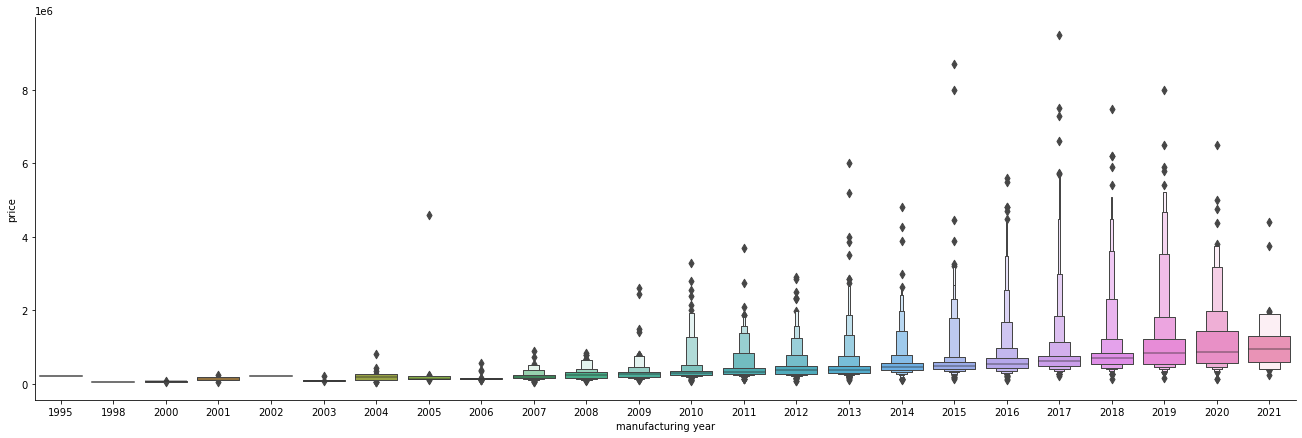

In [32]:
sns.catplot(y = "price", x = "manufacturing year", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

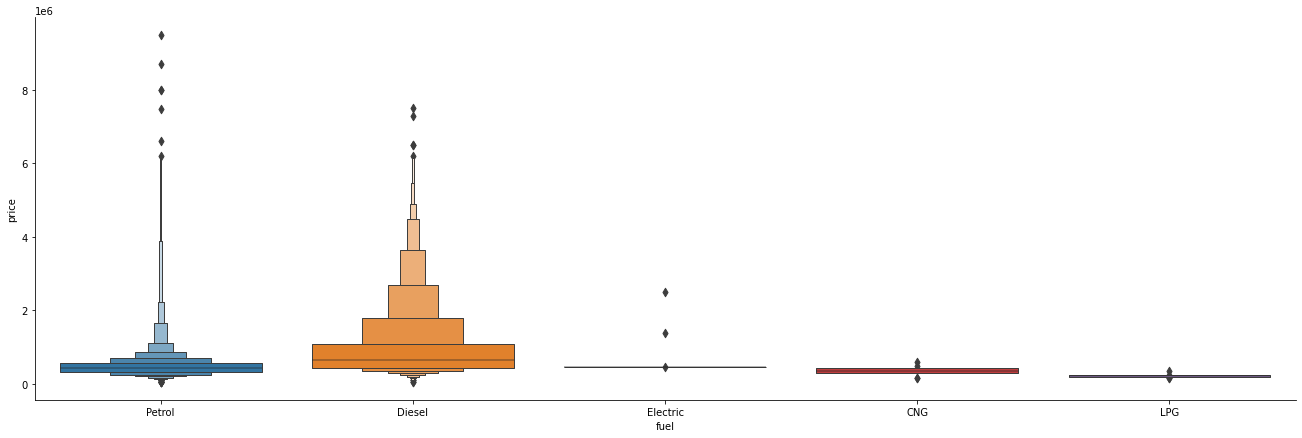

In [33]:
sns.catplot(y = "price", x = "fuel", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

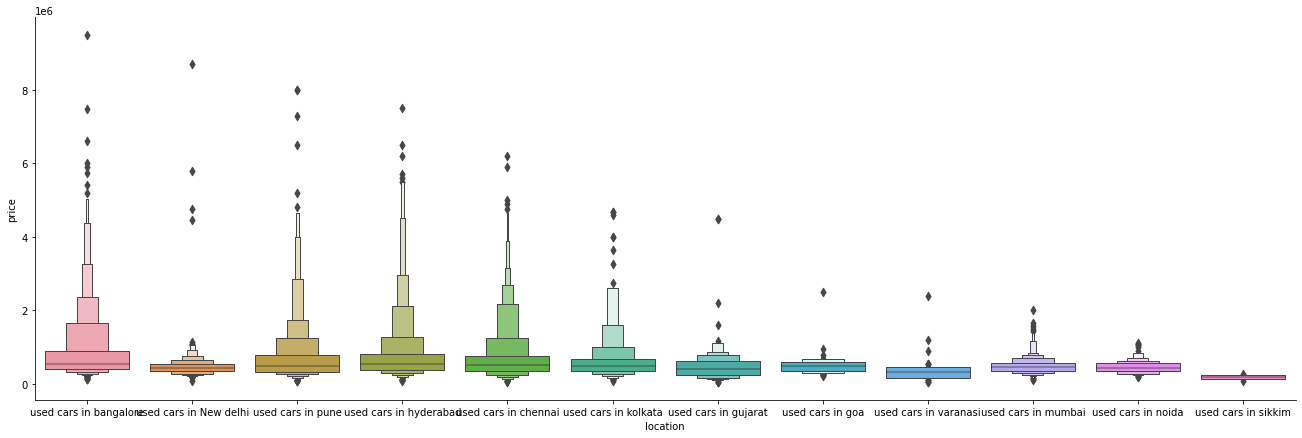

In [34]:
sns.catplot(y = "price", x = "location", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

ENCODING CATEGORICAL OBJECTIVE COLUMNS

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['car name', 'variant', 'fuel', 'location']
for val in list:
    df[val]=le.fit_transform(df[val])
df

car name  variant  manufacturing year  fuel  location  \
0         1204        0                2015     4         2   
1         2017        0                2018     1         2   
2         1433        0                2016     1         2   
3         1449        0                2016     1         2   
4          934        0                2014     1         2   
...        ...      ...                 ...   ...       ...   
5281       370      357                2011     4         8   
5282      2163       79                2019     4         8   
5283      1381      357                2016     4         8   
5284       698      220                2013     4         8   
5285      2343      115                2020     4         8   

      driven kilometers      price  no.of.owners  
0              100035.0   410000.0             1  
1               50000.0   875000.0             1  
2               68000.0   810000.0             1  
3               69000.0  1025000.0             1  
4               45000.0   625000.0             1  
...                 ...        ...           ...  
5281           105621.0   265000.0             1  
5282            28638.0   555000.0             1  
5283           115748.0   315000.0             1  
5284            67159.0   258000.0             1  
5285            10296.0   841000.0             1  

[5286 rows x 8 columns]

array([[<AxesSubplot:title={'center':'car name'}>,
        <AxesSubplot:title={'center':'variant'}>,
        <AxesSubplot:title={'center':'manufacturing year'}>,
        <AxesSubplot:title={'center':'fuel'}>,
        <AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'driven kilometers'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'no.of.owners'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:

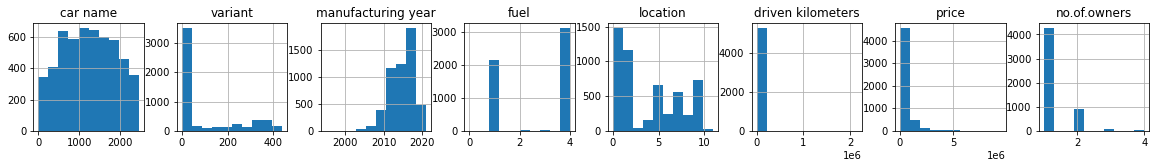

In [33]:
df.hist(figsize=(20,20),grid=True,layout=(8,8))

In [34]:
df.describe()

car name      variant  manufacturing year         fuel     location  \
count  5286.000000  5286.000000         5286.000000  5286.000000  5286.000000   
mean   1244.194098    92.096670         2014.728150     2.765796     4.060726   
std     642.905848   141.682016            3.179712     1.475890     3.113723   
min       0.000000     0.000000         1995.000000     0.000000     0.000000   
25%     713.000000     0.000000         2013.000000     1.000000     1.000000   
50%    1236.000000     0.000000         2015.000000     4.000000     3.000000   
75%    1764.000000   190.000000         2017.000000     4.000000     7.000000   
max    2461.000000   441.000000         2021.000000     4.000000    11.000000   

       driven kilometers         price  no.of.owners  
count       5.286000e+03  5.286000e+03   5286.000000  
mean        5.893670e+04  6.966455e+05      1.219069  
std         4.784958e+04  7.457409e+05      0.478154  
min         2.800000e+02  4.000000e+04      1.000000  
25%         3.359600e+04  3.500000e+05      1.000000  
50%         5.486750e+04  4.950000e+05      1.000000  
75%         7.835650e+04  7.000000e+05      1.000000  
max         2.150000e+06  9.500000e+06      4.000000

In [35]:
df.skew()

car name              -0.007211
variant                1.133149
manufacturing year    -0.746592
fuel                  -0.364906
location               0.357118
driven kilometers     18.139702
price                  4.408373
no.of.owners           2.351874
dtype: float64

car name                AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
variant               AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
manufacturing year    AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
fuel                  AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
location              AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
driven kilometers     AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
price                 AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
no.of.owners          AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
dtype: object

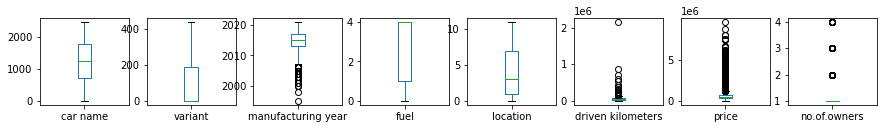

In [36]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.06252533, 0.65008521, 0.08550331, ..., 0.85898741, 0.38441313,
        0.45819927],
       [1.20216516, 0.65008521, 1.02907426, ..., 0.18678427, 0.2391868 ,
        0.45819927],
       [0.2937036 , 0.65008521, 0.40002696, ..., 0.18943018, 0.15201692,
        0.45819927],
       ...,
       [0.21281319, 1.86988015, 0.40002696, ..., 1.18740172, 0.51181526,
        0.45819927],
       [0.84965127, 0.90283462, 0.54354399, ..., 0.17185261, 0.58825654,
        0.45819927],
       [1.70928582, 0.16166834, 1.65812156, ..., 1.01662975, 0.19359025,
        0.45819927]])

In [38]:
df_new=df[(z<3).all(axis=1)]
df_new

car name  variant  manufacturing year  fuel  location  \
0         1204        0                2015     4         2   
1         2017        0                2018     1         2   
2         1433        0                2016     1         2   
3         1449        0                2016     1         2   
4          934        0                2014     1         2   
...        ...      ...                 ...   ...       ...   
5281       370      357                2011     4         8   
5282      2163       79                2019     4         8   
5283      1381      357                2016     4         8   
5284       698      220                2013     4         8   
5285      2343      115                2020     4         8   

      driven kilometers      price  no.of.owners  
0              100035.0   410000.0             1  
1               50000.0   875000.0             1  
2               68000.0   810000.0             1  
3               69000.0  1025000.0             1  
4               45000.0   625000.0             1  
...                 ...        ...           ...  
5281           105621.0   265000.0             1  
5282            28638.0   555000.0             1  
5283           115748.0   315000.0             1  
5284            67159.0   258000.0             1  
5285            10296.0   841000.0             1  

[5018 rows x 8 columns]

In [39]:
df.shape

(5286, 8)

In [40]:
5018/5286

0.9493000378357926

In [41]:
df_new.skew()

car name              0.010084
variant               1.054461
manufacturing year   -0.495162
fuel                 -0.413852
location              0.331175
driven kilometers     0.749671
price                 2.472475
no.of.owners          1.677364
dtype: float64

BY USING LOG TRANSFORM METHOD

In [42]:
values=["variant","no.of.owners"]
for i in values:
    df_new[i]=np.log1p(df_new[i])
df_new.skew()

car name              0.010084
variant               0.566163
manufacturing year   -0.495162
fuel                 -0.413852
location              0.331175
driven kilometers     0.749671
price                 2.472475
no.of.owners          1.677364
dtype: float64

CORRELATION GRAPH

In [43]:
df_new.corr()

car name   variant  manufacturing year      fuel  \
car name            1.000000  0.074549            0.977072  0.011396   
variant             0.074549  1.000000            0.153831  0.105091   
manufacturing year  0.977072  0.153831            1.000000  0.001044   
fuel                0.011396  0.105091            0.001044  1.000000   
location           -0.018342  0.031595           -0.018250  0.012548   
driven kilometers  -0.482332 -0.081952           -0.474785 -0.398823   
price               0.349479 -0.226778            0.339472 -0.362459   
no.of.owners       -0.271818 -0.039909           -0.273050 -0.007749   

                    location  driven kilometers     price  no.of.owners  
car name           -0.018342          -0.482332  0.349479     -0.271818  
variant             0.031595          -0.081952 -0.226778     -0.039909  
manufacturing year -0.018250          -0.474785  0.339472     -0.273050  
fuel                0.012548          -0.398823 -0.362459     -0.007749  
location            1.000000           0.003516 -0.067622     -0.014090  
driven kilometers   0.003516           1.000000 -0.059704      0.143664  
price              -0.067622          -0.059704  1.000000     -0.049428  
no.of.owners       -0.014090           0.143664 -0.049428      1.000000

<AxesSubplot:>

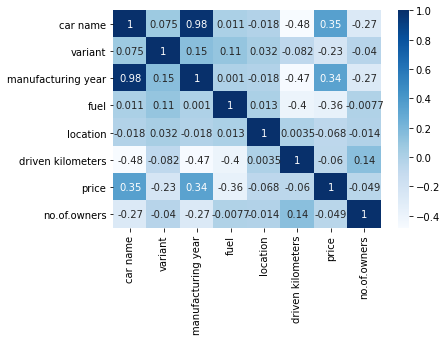

In [44]:
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

CHECKING FOR VIF FACTOR

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'price']
x

car name   variant  manufacturing year  fuel  location  \
0         1204  0.000000                2015     4         2   
1         2017  0.000000                2018     1         2   
2         1433  0.000000                2016     1         2   
3         1449  0.000000                2016     1         2   
4          934  0.000000                2014     1         2   
...        ...       ...                 ...   ...       ...   
5281       370  5.880533                2011     4         8   
5282      2163  4.382027                2019     4         8   
5283      1381  5.880533                2016     4         8   
5284       698  5.398163                2013     4         8   
5285      2343  4.753590                2020     4         8   

      driven kilometers  no.of.owners  
0              100035.0      0.693147  
1               50000.0      0.693147  
2               68000.0      0.693147  
3               69000.0      0.693147  
4               45000.0      0.693147  
...                 ...           ...  
5281           105621.0      0.693147  
5282            28638.0      0.693147  
5283           115748.0      0.693147  
5284            67159.0      0.693147  
5285            10296.0      0.693147  

[5018 rows x 7 columns]

In [46]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [47]:
calc_vif(x)

variable  VIF factor
0            car name    7.332851
1             variant    1.633120
2  manufacturing year   63.007128
3                fuel    5.851748
4            location    2.723979
5   driven kilometers    6.934869
6        no.of.owners   27.329806

STANDARD SCALER METHOD

In [48]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x

array([[-0.0789835 , -0.77703449,  0.05648582, ..., -0.66884182,
         1.34360168, -0.46654648],
       [ 1.21587833, -0.77703449,  1.0663879 , ..., -0.66884182,
        -0.22985816, -0.46654648],
       [ 0.28574388, -0.77703449,  0.39311985, ..., -0.66884182,
         0.33619115, -0.46654648],
       ...,
       [ 0.20292369,  1.45679348,  0.39311985, ...,  1.25782193,
         1.83773128, -0.46654648],
       [-0.88488767,  1.27355631, -0.61678223, ...,  1.25782193,
         0.30974407, -0.46654648],
       [ 1.73509722,  1.02870366,  1.73965595, ...,  1.25782193,
        -1.47843714, -0.46654648]])

In [49]:
y=df_new.iloc[:,6]
y

0        410000.0
1        875000.0
2        810000.0
3       1025000.0
4        625000.0
          ...    
5281     265000.0
5282     555000.0
5283     315000.0
5284     258000.0
5285     841000.0
Name: price, Length: 5018, dtype: float64

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [50]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=RandomForestRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.4852388594132687 on random state 173


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=173)

In [52]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= -1.2490075151080533
training score= 0.30570781068663466
error= 361583.48744380125 

testing score= 0.3976290301787093
training score= 0.9999009308019492
error= 368994.0138313077 

testing score= -7829660.666836911
training score= -0.07846127049304163
error= 458103.12126081524 

testing score= 0.4919853657312482
training score= 0.9360995389414722
error= 250245.90513057608 

testing score= -0.08542482110966088
training score= 0.5145690493172256
error= 337135.2394742925 



CROSS VALIDATION PROCESS

In [53]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [ 0.30420257  0.20419601  0.17736819  0.33370697 -0.01271277]
mean_score= 0.2013521929920755
std= 0.12206810744629441 

score= [ 0.20796064  0.11308937 -0.10755703 -0.19789315 -0.27033069]
mean_score= -0.050946171775921825
std= 0.18268451952998604 

score= [-0.12307873 -0.2049785  -0.03518177 -0.09321383 -0.00395219]
mean_score= -0.09208100403394033
std= 0.0703024879408937 

score= [0.38783951 0.40533041 0.36168882 0.35067042 0.3356761 ]
mean_score= 0.3682410523363367
std= 0.025186720536249815 

score= [0.04688174 0.10883655 0.06852083 0.00693734 0.01836246]
mean_score= 0.049907786040960224
std= 0.03652333102416313 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters={"criterion":["squared_error","absolute_error", "poisson"],"warm_start":[True,False],"bootstrap": [True,False], "max_features": ["auto","sqrt","log2"]}

In [62]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [63]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [64]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_features': 'auto',
 'warm_start': False}

In [65]:
final_model=RandomForestRegressor(bootstrap=True,criterion="poisson",max_features="auto",warm_start=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.391433967360456
score= 0.9282391300820964
284069.5044038901


SAVING THE BEST MODEL

In [66]:
import joblib

joblib.dump(final_model,"second_hand_car_price_prediction.obj")

['second_hand_car_price_prediction.obj']

In [67]:
second_hand_car_price_prediction_from_joblib=joblib.load("second_hand_car_price_prediction.obj")
second_hand_car_price_prediction_from_joblib.predict(x_test)

array([ 854600.,  653940.,  269900., ...,  545180.,  442170., 1043705.])